In [1]:
from nimlab import datasets as nimds
import numpy as np
from nilearn import image, plotting, maskers
import nibabel as nib
import os
import pandas as pd
import glob
import platform
import warnings
warnings.filterwarnings('ignore')

In [19]:
#User Input Below

## Paths Input Here
analysis = "47_vs_79_disagreement_map"
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    map_one = r"/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/response_topology/subiculum_connectivity_by_age/79_years_old.nii"    
    map_two = r"/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/response_topology/subiculum_connectivity_by_age/47_years_old.nii"
    out_dir = rf'/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/disagreement_networks'
    #out_dir = r'path to out dir here'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\stats'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

I have set pathnames in the Mac style


In [14]:
#Prepare the data
mni_mask = nimds.get_img("mni_icbm152")
img_one = image.load_img(map_one)
img_two = image.load_img(map_two)

In [15]:
#Import data
matrix_one = img_one.get_fdata()
matrix_one = np.nan_to_num(matrix_one, nan=0, posinf=0, neginf=0)
matrix_one = matrix_one/abs(np.max(matrix_one))

matrix_two = img_two.get_fdata()
matrix_two = np.nan_to_num(matrix_two,nan=0, posinf=0, neginf=0)
matrix_two = matrix_two/abs(np.max(matrix_two))

#Assign new variables
improvement_matrix = matrix_one
impairment_matrix = matrix_two

#Generate Matching Improving Areas
disagreement_matrix = np.zeros(matrix_one.shape)
arb_matrix1 = np.zeros(matrix_one.shape)
arb_matrix2 = np.zeros(matrix_one.shape)
arb_matrix1[improvement_matrix>0] = 1
arb_matrix2[impairment_matrix<0] = 1
disagreement_matrix_one = arb_matrix1*arb_matrix2

#Generate Matching Impairing Areas
arb_matrix1 = np.zeros(matrix_one.shape)
arb_matrix2 = np.zeros(matrix_one.shape)
arb_matrix1[improvement_matrix<0] = -1
arb_matrix2[impairment_matrix>0] = -1
disagreement_matrix_two = -(arb_matrix1*arb_matrix2)
binary_disagreement_matrix = disagreement_matrix_one + disagreement_matrix_two
print(np.count_nonzero(binary_disagreement_matrix))


#Creating the NORMALIZED improvement matrix 
mx1 = disagreement_matrix_one * improvement_matrix
mx2 = disagreement_matrix_one * impairment_matrix
normalized_disagreement_matrix1 = (mx1**2 + mx2**2)

#Creating the NORMALIZED impairment matrix 
mx1 = abs(disagreement_matrix_two) * improvement_matrix
mx2 = abs(disagreement_matrix_two) * impairment_matrix
normalized_disagreement_matrix2 = -(mx1**2 + mx2**2)
normalized_disagreement_matrix = normalized_disagreement_matrix1 + normalized_disagreement_matrix2
normalized_disagreement_matrix = normalized_disagreement_matrix/np.max(abs(normalized_disagreement_matrix))

#Calculating Disagreement
nonzero_1 = np.count_nonzero(matrix_one)
nonzero_2 = np.count_nonzero(matrix_two)
dis_nonzero = np.count_nonzero(binary_disagreement_matrix)
disagreement = dis_nonzero/np.count_nonzero(matrix_one)*100

print('---Sanity Check---')
print('improvement matrix total nonzero voxels: ', nonzero_1)
print('impairment matrix total nonzero voxels: ', nonzero_2)
print('nonzero values, disagreement matrix: ', dis_nonzero)
print('spatial disagreement: ', disagreement)


274251
---Sanity Check---
improvement matrix total nonzero voxels:  292019
impairment matrix total nonzero voxels:  292019
nonzero values, disagreement matrix:  274251
spatial disagreement:  93.91546440471339


Normalized Disagreement Map



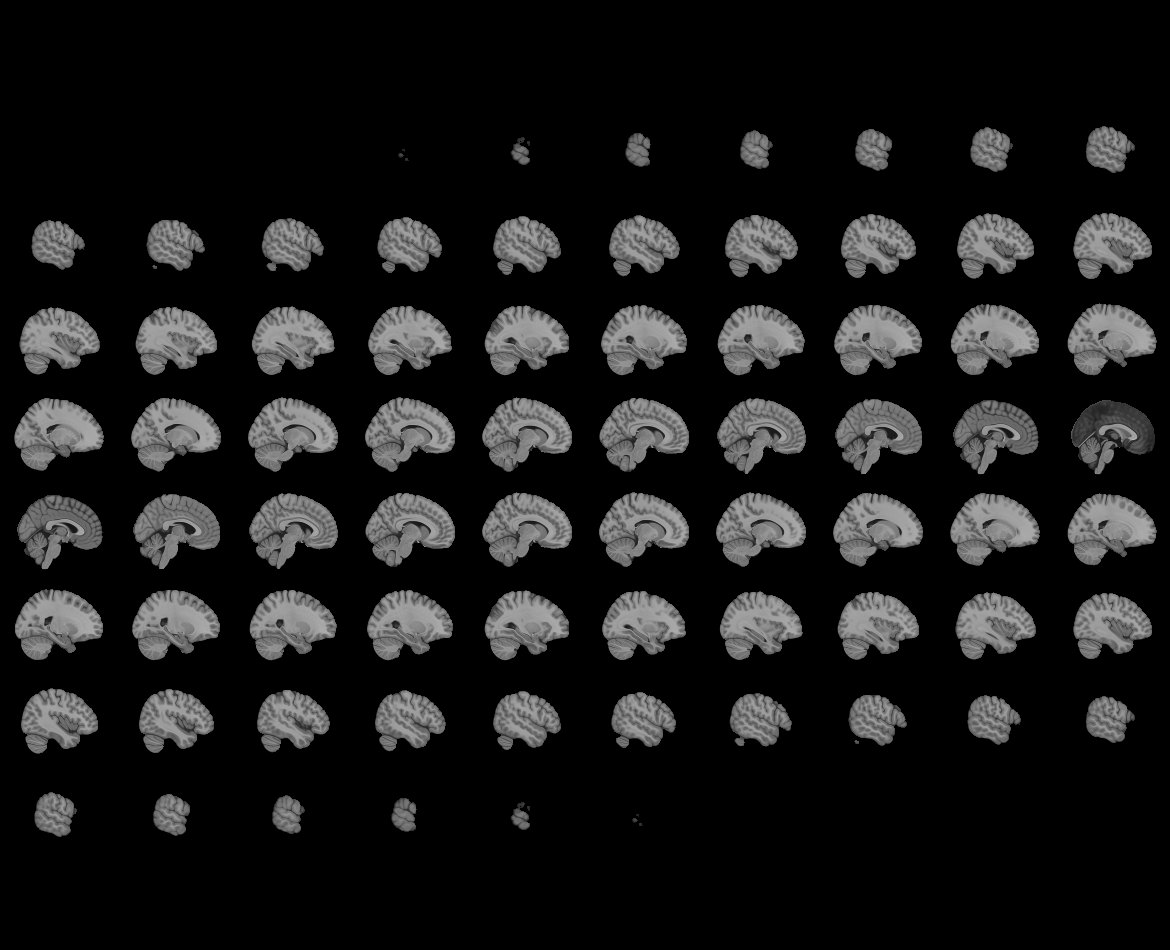
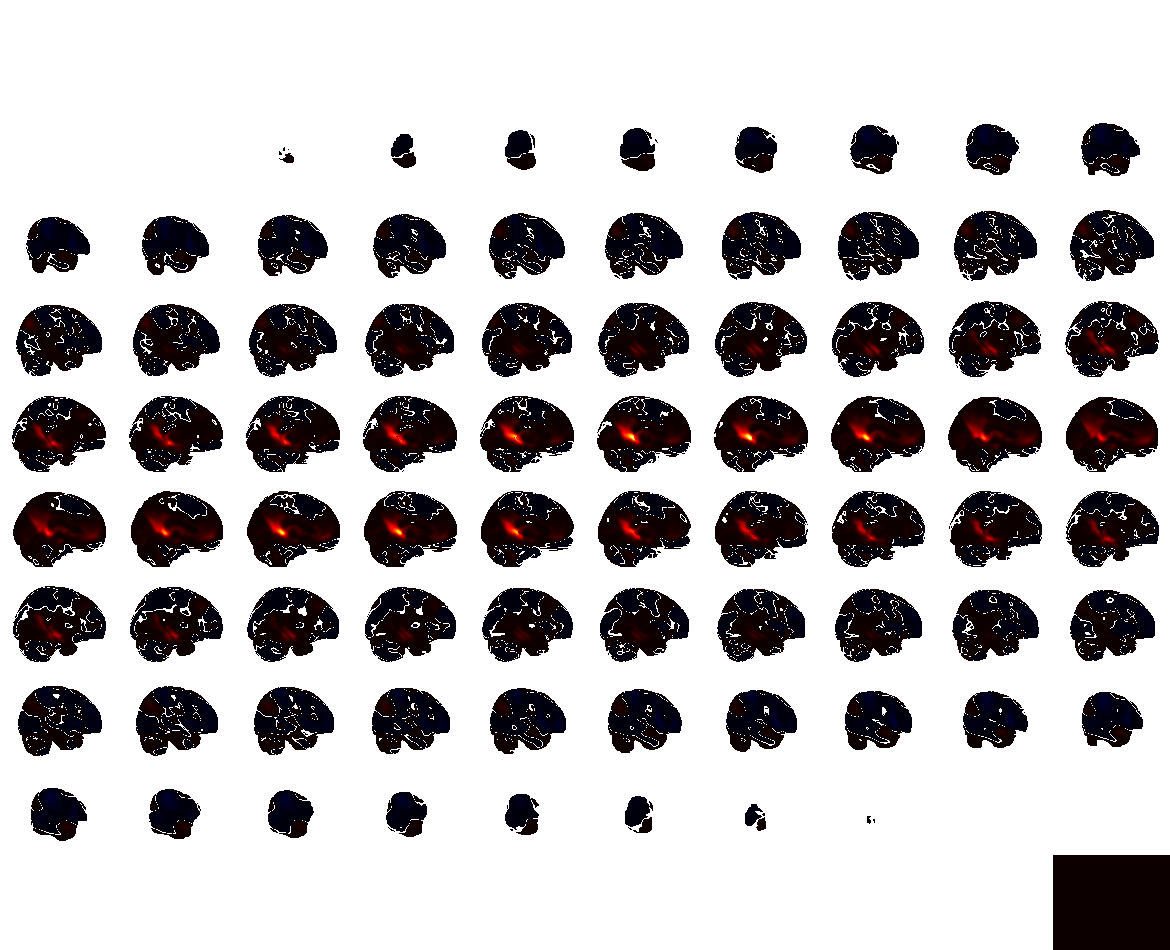

In [16]:
print('Normalized Disagreement Map')
normalized_disagreement_map = image.new_img_like(mni_mask, normalized_disagreement_matrix)
normalized_html = plotting.view_img(normalized_disagreement_map, cut_coords=(0,0,0), opacity=.75)
normalized_html

Binarized Disagreement Map



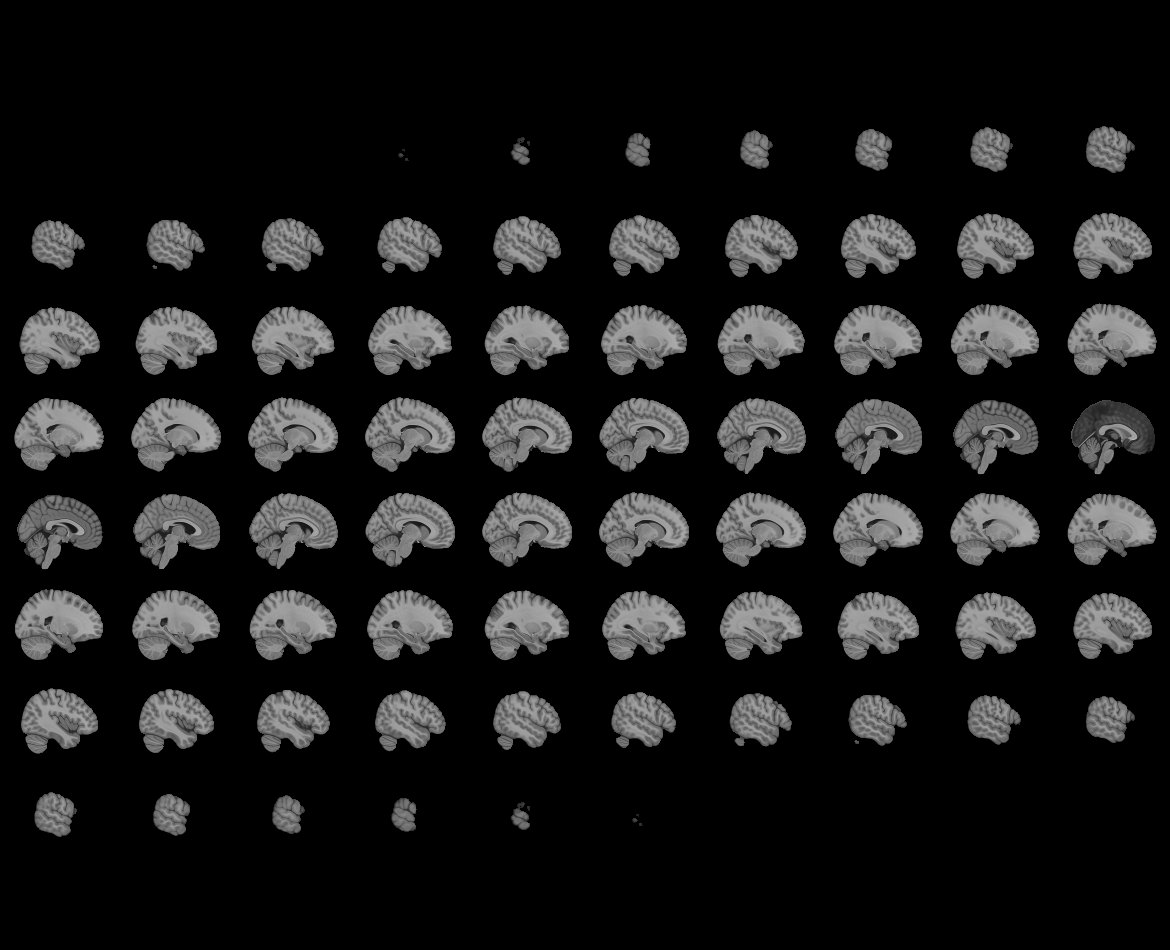
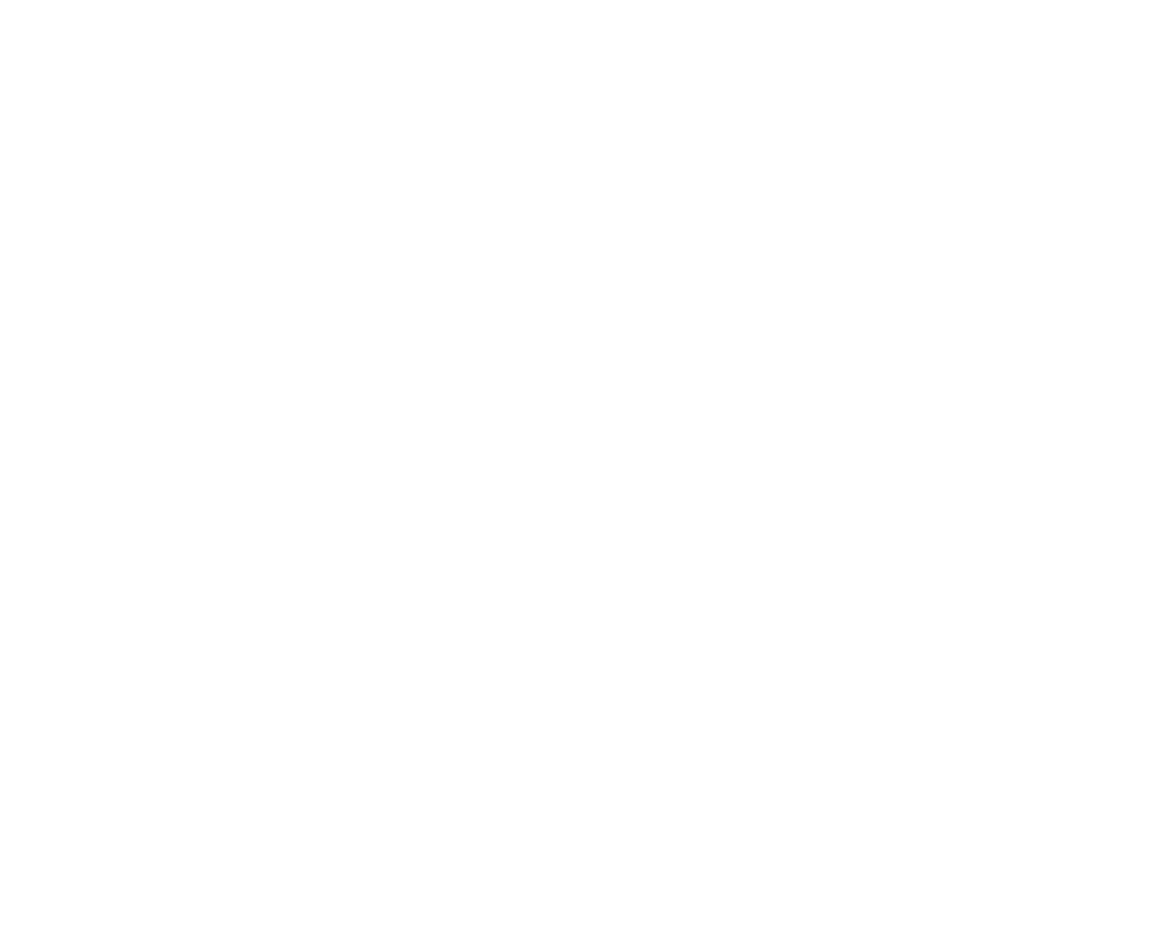

In [6]:
print('Binarized Disagreement Map')
binary_disagreement_map = image.new_img_like(mni_mask, disagreement_matrix)
binary_html = plotting.view_img(binary_disagreement_map, cut_coords=(0,0,0), opacity=.75)
binary_html

Improvement Matrix



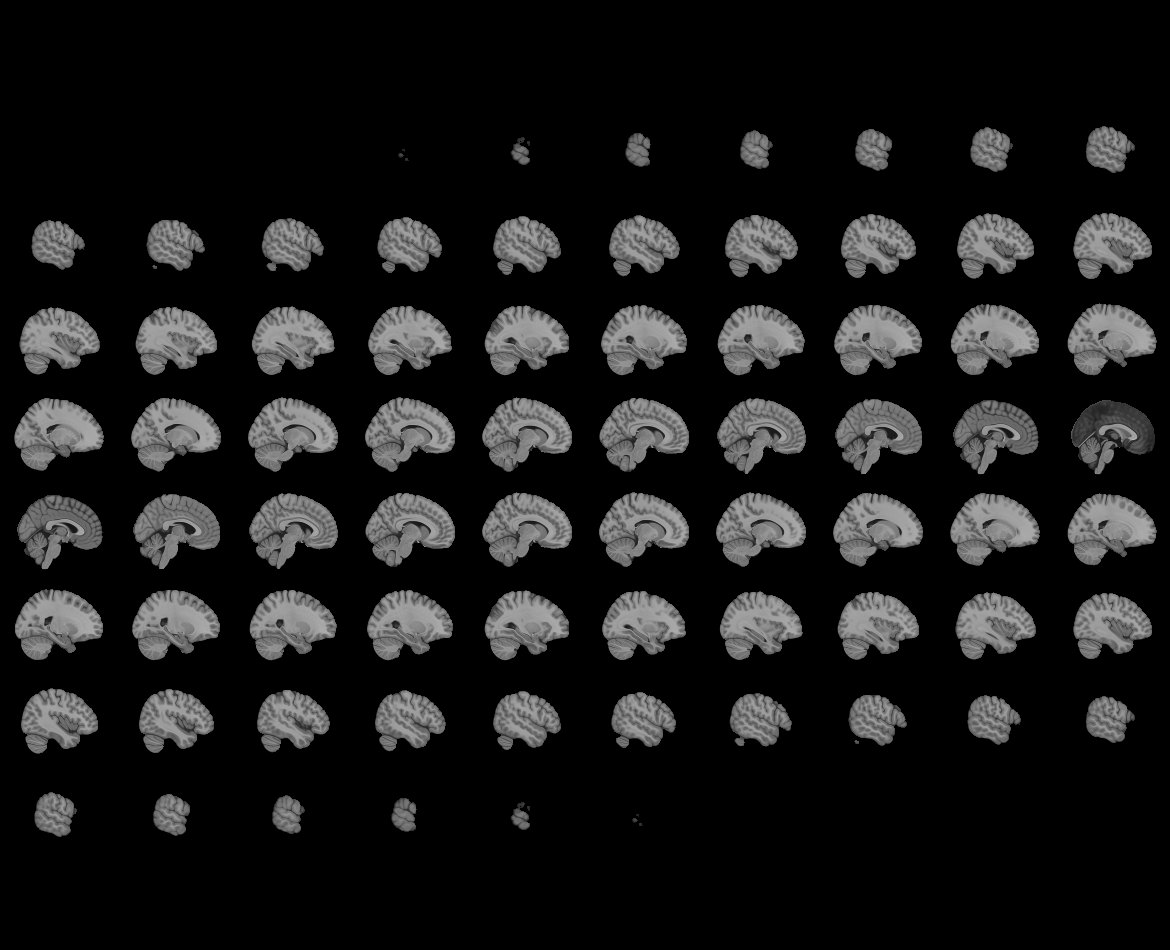
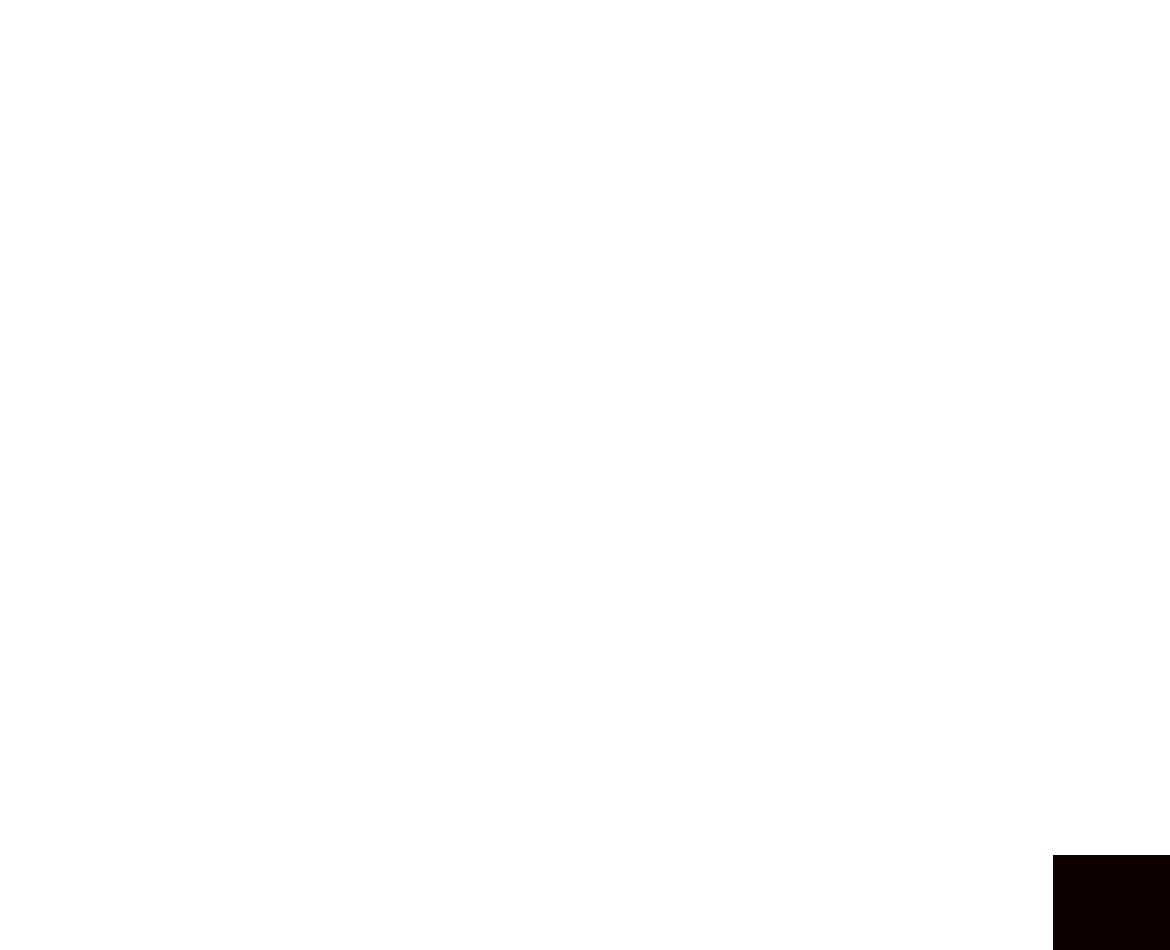

In [7]:
print('Improvement Matrix')
improvement_map = image.new_img_like(mni_mask, disagreement_matrix_one)
improvement_html = plotting.view_img(improvement_map, cut_coords=(0,0,0), opacity=.75)
improvement_html

Impairment Matrix



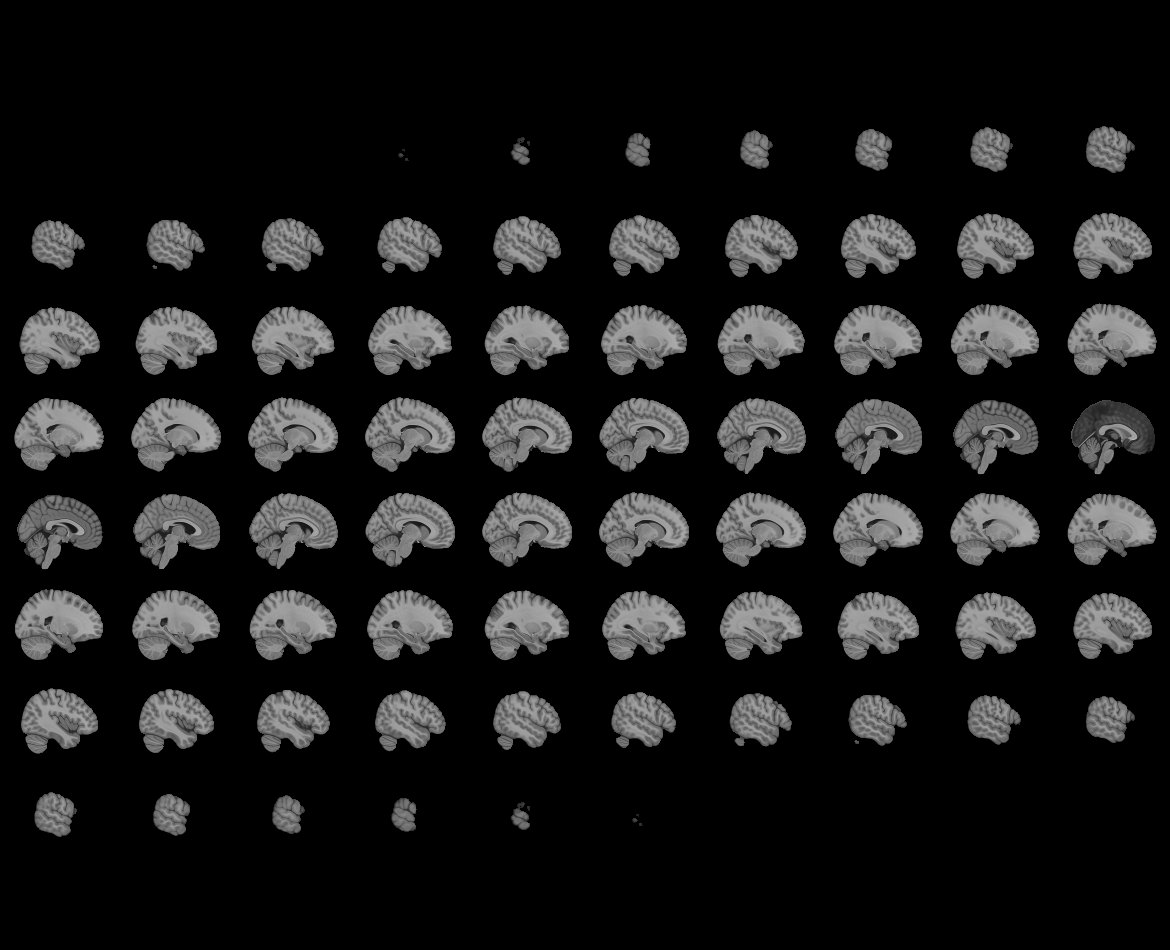
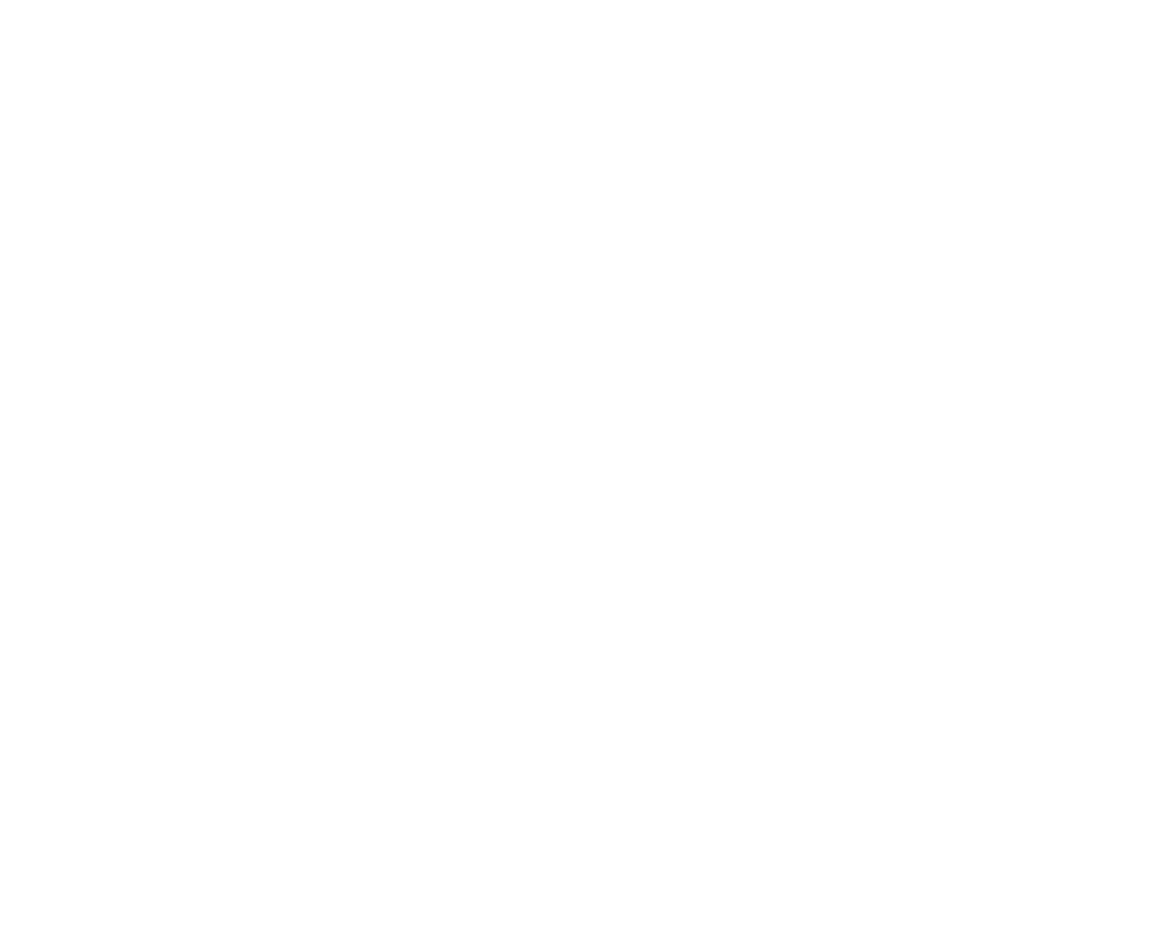

In [8]:
print('Impairment Matrix')
impairment_matrix = image.new_img_like(mni_mask, disagreement_matrix_two)
improvement_html = plotting.view_img(impairment_matrix, cut_coords=(0,0,0), opacity=.75)
improvement_html

first matrix



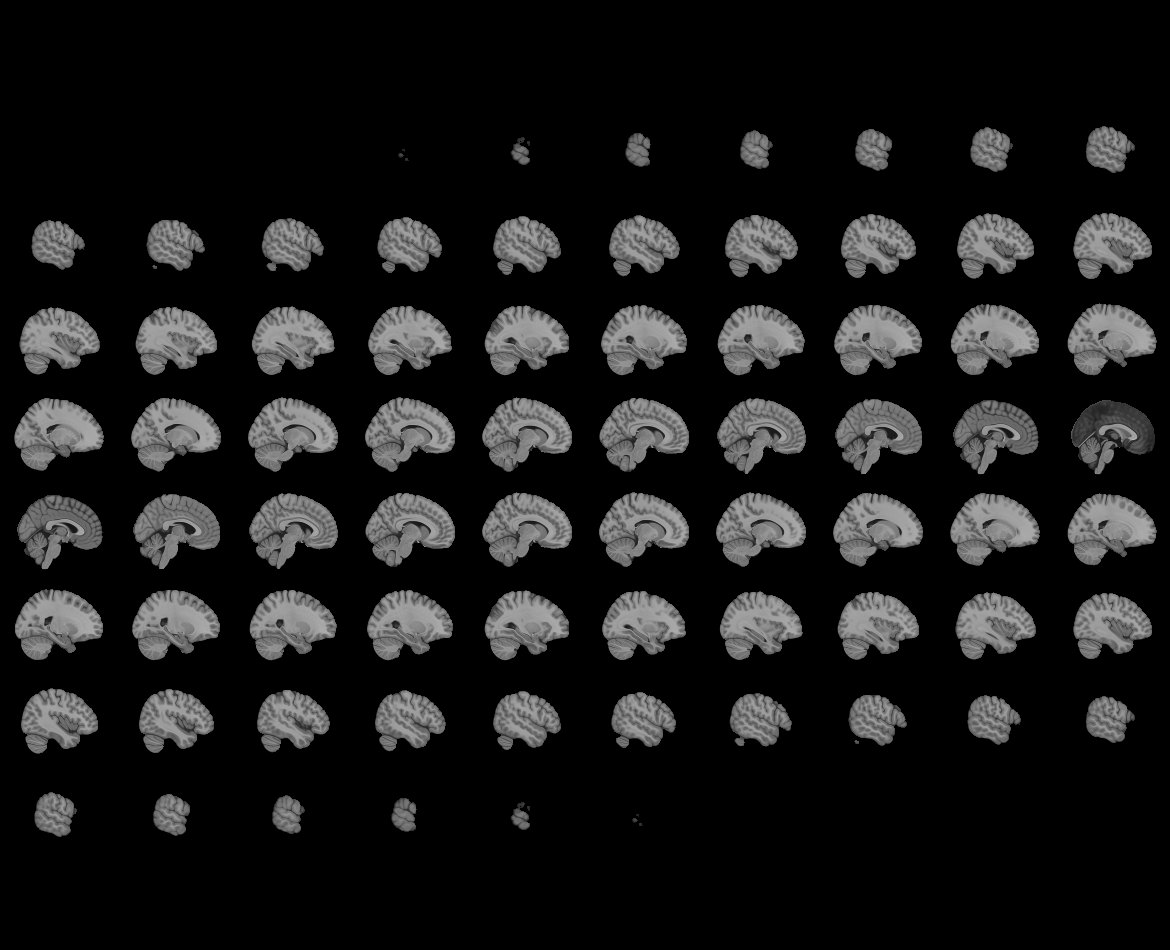
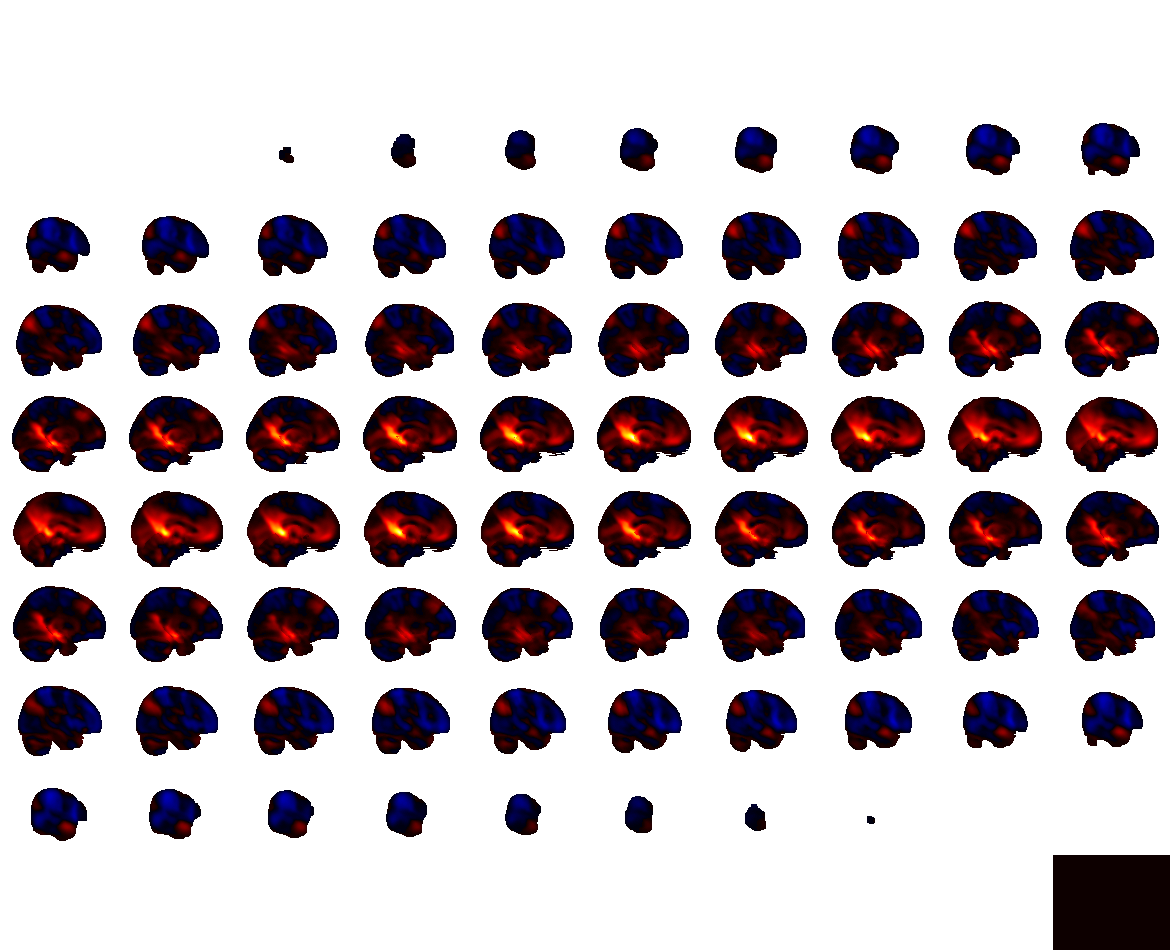

In [9]:
print('first matrix')
img_one = image.load_img(map_one)
html_one = plotting.view_img(img_one, cut_coords=(0,0,0), opacity=0.75)
html_one

second matrix



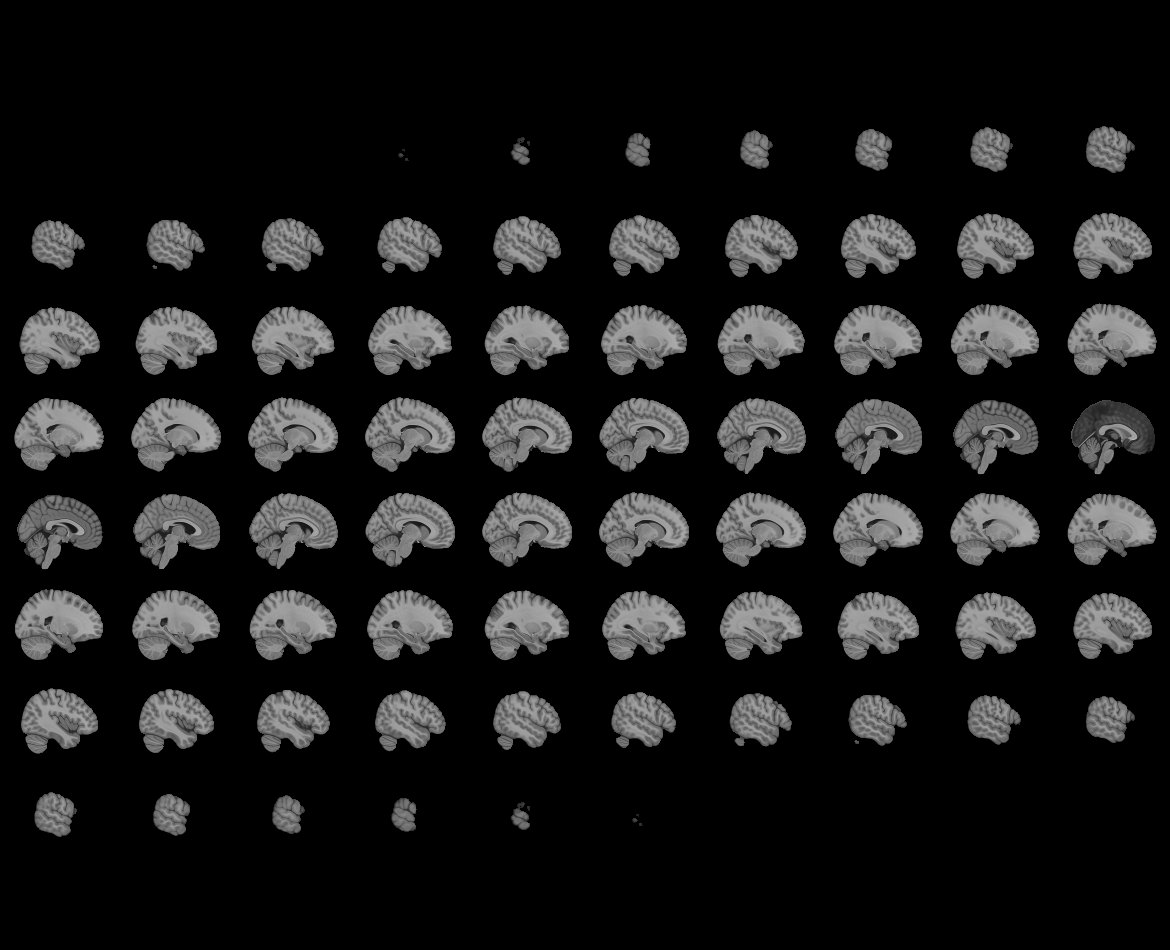
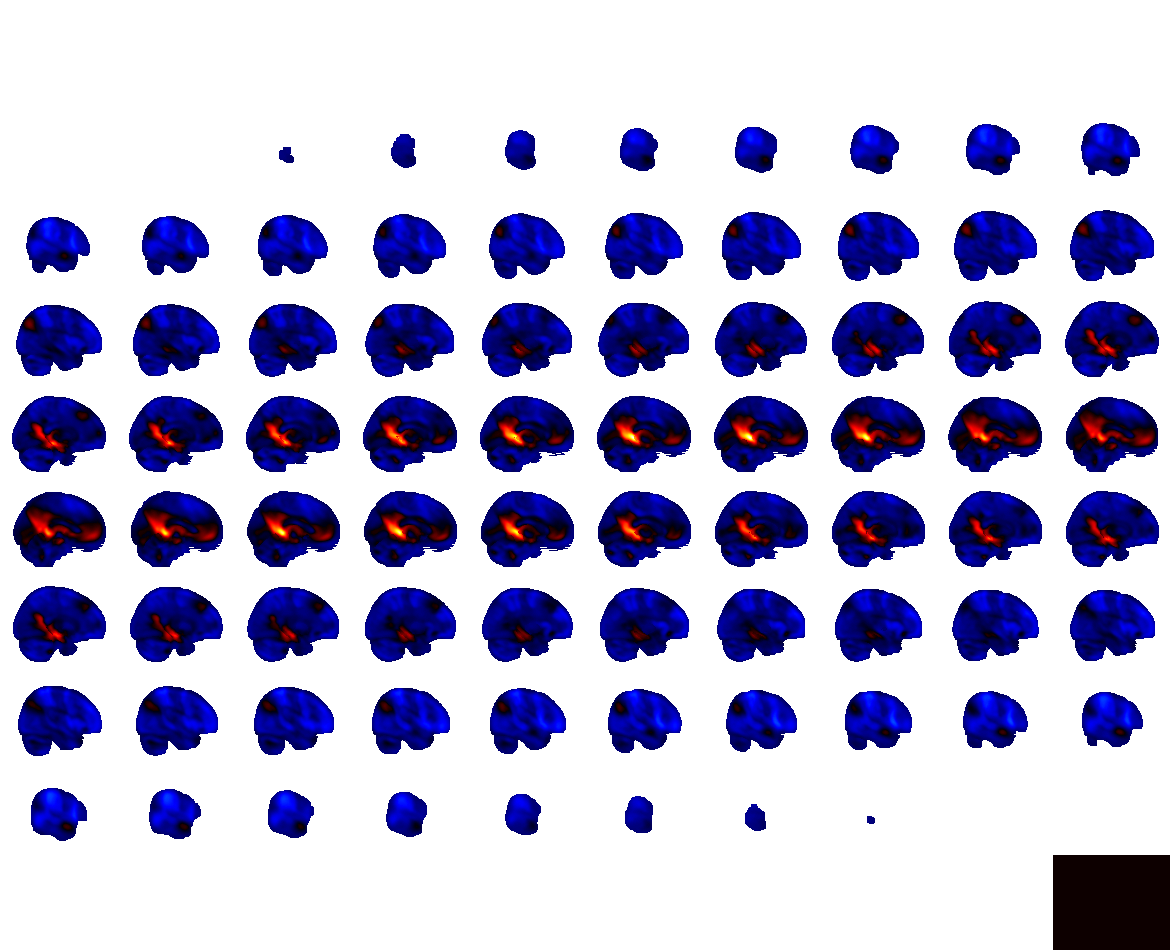

In [10]:
print('second matrix')
img_two = image.load_img(map_two)
html_two = plotting.view_img(img_two, cut_coords=(0,0,0), opacity=0.75)
html_two

In [17]:
#calculate the spatial correlation of agreement areas
#Spatial Agreement
agree_df = pd.DataFrame({'percent_geomtric_disagreement': [disagreement]})
display(agree_df)
#Spatial Correlation
#in work

percent_geomtric_disagreement
0                      93.915464

In [20]:
#Save the files
#Save values
name = analysis
agree_df.to_csv(os.path.join(out_dir, f'{analysis}_perc_disagreement.csv'))

#Save niftis
binary_disagreement_map.to_filename(os.path.join(out_dir, f'{analysis}_disagree_map_binarized.nii'))
normalized_disagreement_map.to_filename(os.path.join(out_dir, f'{analysis}_normalized_disagree_map.nii'))

#Save htmls
binary_html.save_as_html(os.path.join(out_dir, 'binary_disagree_map.html'))
normalized_html.save_as_html(os.path.join(out_dir, 'normalized_disagree_map.html'))
html_one.save_as_html(os.path.join(out_dir, os.path.basename(map_one).split('.nii')[0] + '.html'))
html_two.save_as_html(os.path.join(out_dir, os.path.basename(map_two).split('.nii')[0] + '.html'))

#Save disagreement mask as seed
disagreement_seed = image.new_img_like(mni_mask, abs(binary_disagreement_matrix))
disagreement_seed.to_filename(os.path.join(out_dir, f'{analysis}_disagreement_mask.nii' ))
print('saved to: ', out_dir)

saved to:  /Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/disagreement_networks
